# **Проверка гипотез**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, shapiro, levene, kruskal

In [ ]:
df = pd.read_excel("all_vacancies_clean.xlsx")

In [ ]:
df.head()

,Unnamed: 0,id,name,company,city,key_skills,salary_from,salary_to,experience,schedule,alternate_url,salary,area,Vacancy type
0,0,114673345,BI-аналитик,ЛУКОЙЛ,Москва,"Power BI, Apache Airflow, SQL",150000,150000,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/114673345,150000,Мск_МО,BI-аналитик
1,1,117262495,Аналитик,Всм,Москва,"Контроль и анализ ценообразования, Unit-эконом...",80000,120000,От 1 года до 3 лет,Удаленная работа,https://hh.ru/vacancy/117262495,100000,Мск_МО,Финансовый аналитик
2,2,116537974,Системный аналитик (junior+),ИТРУМ,Ростов-на-Дону,"Системный аналитик, UML, SQL, Функциональные т...",70000,80000,Нет опыта,Удаленная работа,https://hh.ru/vacancy/116537974,75000,ЮФО,Системный аналитик
3,3,117148794,Логист - аналитик маркетплейсов,Uniel,Москва,"Аналитическое мышление, Аналитика маркетплейсо...",80000,80000,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/117148794,80000,Мск_МО,Аналитик маркетплейсов
4,4,116518807,"Интервьюер (кастдэв, аналитика)",ЮДжейПи,Екатеринбург,"Телефонные переговоры, Коммуникабельность, Ана...",60000,60000,От 1 года до 3 лет,Удаленная работа,https://hh.ru/vacancy/116518807,60000,УФО,Другое




---



# Гипотеза 1: Зарплаты в Москве статистически значимо выше, чем в любом другом городе



---



Нулевая гипотеза (H₀): Средняя зарплата в Москве равна или меньше средней зарплаты в других городах

Альтернативная гипотеза (H₁): Средняя зарплата в Москве выше средней зарплаты в других городах

Москва, как экономический и финансовый центр России, привлекает крупные компании и высококвалифицированных специалистов, что может способствовать более высокому уровню зарплат по сравнению с другими регионами, где рынок труда менее конкурентен.

In [ ]:
# Разделяем данные на две группы
moscow_salaries = df[df['city'] == 'Москва']['salary']
other_cities_salaries = df[df['city'] != 'Москва']['salary']

# Вычисляем средние зарплаты
mean_moscow = moscow_salaries.mean()
mean_other = other_cities_salaries.mean()
difference = mean_moscow - mean_other

# Выводим средние значения и разницу
print(f"Средняя зарплата в Москве: {mean_moscow:.2f}")
print(f"Средняя зарплата в других городах: {mean_other:.2f}")
print(f"Разница: {difference:.2f} (Москва - другие города)")

Средняя зарплата в Москве: 115028.72
Средняя зарплата в других городах: 88410.63
Разница: 26618.09 (Москва - другие города)


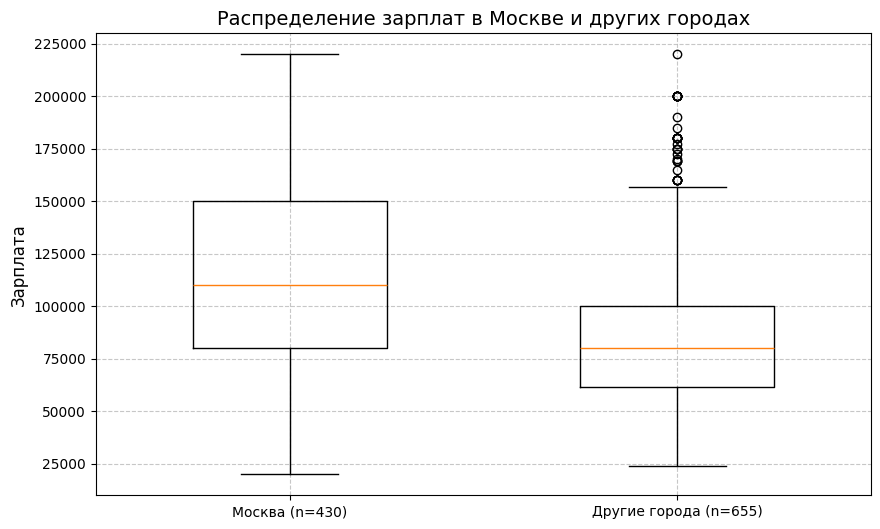

In [29]:
plt.figure(figsize=(10, 6))

plt.boxplot(
    [moscow_salaries, other_cities_salaries],
    tick_labels=[f'Москва (n={len(moscow_salaries)})', f'Другие города (n={len(other_cities_salaries)})'],
    widths=0.5
)

plt.title('Распределение зарплат в Москве и других городах', fontsize=14)
plt.ylabel('Зарплата', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Проведение t-теста (одностороннего)
t_stat, p_value = stats.ttest_ind(moscow_salaries, other_cities_salaries, alternative='greater')

# Вывод результатов
print(f"\nt-статистика: {t_stat:.4f}, p-значение: {p_value:.4f}")

# Интерпретация
alpha = 0.05
if p_value < alpha:
    print("\nВывод: Зарплаты в Москве статистически значимо выше.")
else:
    print("\nВывод: Недостаточно доказательств, чтобы утверждать, что в Москве зарплаты выше.")


t-статистика: 10.9186, p-значение: 0.0000

Вывод: Зарплаты в Москве статистически значимо выше.


Так как p-значение (0.0000) значительно меньше уровня значимости (0.05), мы отвергаем нулевую гипотезу (H₀: Средняя зарплата в Москве равна или меньше средней зарплаты в других городах). Это означает, что есть убедительные статистически значимые доказательства в пользу альтернативной гипотезы (H₁), подтверждающей, что средняя зарплата в Москве выше, чем в других городах.



---



# Гипотеза 2: Средняя зарплата для режима работы "Полный день" выше, чем для других режимов



---



Нулевая гипотеза (H₀): Средняя зарплата для режима работы "Полный день" равна или меньше средней зарплаты для других режимов работы


Альтернативная гипотеза (H₁): Средняя зарплата для режима работы "Полный день" выше средней зарплаты для других режимов работы

Работа на полный день часто предполагает большую занятость и ответственность, что может сопровождаться более высокими зарплатами по сравнению с гибкими или удаленными режимами, которые иногда ассоциируются с частичной занятостью или менее интенсивными задачами.

Согласно практическим исследованиям (например, данные порталов hh.ru и SuperJob), вакансии с частичной занятостью или гибким графиком часто относятся к начальным позициям или поддерживающим функциям, которые предполагают меньшую оплату.

In [ ]:
# Разделяем данные на две группы
full_day_salaries = df[df['schedule'] == 'Полный день']['salary']
other_schedules_salaries = df[df['schedule'].isin(['Удаленная работа', 'Гибкий график', 'Сменный график'])]['salary']

# Вычисляем средние зарплаты
full_day_mean = full_day_salaries.mean()
other_schedules_mean = other_schedules_salaries.mean()

# Выводим средние значения и размеры выборок
print(f"Средняя зарплата для 'Полный день': {full_day_mean:.2f} (n={len(full_day_salaries)})")
print(f"Средняя зарплата для других типов: {other_schedules_mean:.2f} (n={len(other_schedules_salaries)})")

Средняя зарплата для 'Полный день': 99763.53 (n=728)
Средняя зарплата для других типов: 97320.62 (n=357)


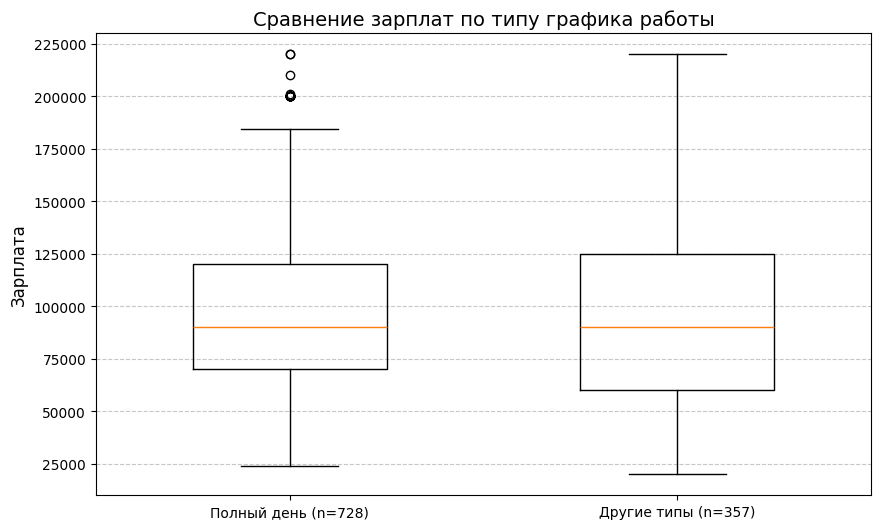

In [ ]:
plt.figure(figsize=(10, 6))

plt.boxplot(
    [full_day_salaries, other_schedules_salaries],
    tick_labels=[f'Полный день (n={len(full_day_salaries)})', f'Другие типы (n={len(other_schedules_salaries)})'],
    widths=0.5
)

plt.title('Сравнение зарплат по типу графика работы', fontsize=14)
plt.ylabel('Зарплата', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Проведение t-теста (одностороннего)
t_stat, p_value = stats.ttest_ind(full_day_salaries, other_schedules_salaries, alternative='greater')

# Вывод результатов
print(f"t-статистика: {t_stat:.4f}, p-значение: {p_value:.4f}")

# Интерпретация
alpha = 0.05
if p_value < alpha:
    print("Вывод: Отвергаем нулевую гипотезу: зарплаты для 'Полный день' статистически значимо выше, чем для других типов работы.")
else:
    print("Вывод: Не можем отвергнуть нулевую гипотезу: нет достаточных доказательств, что зарплаты для 'Полный день' выше.")

t-статистика: 0.9140, p-значение: 0.1805
Вывод: Не можем отвергнуть нулевую гипотезу: нет достаточных доказательств, что зарплаты для 'Полный день' выше.


Так как p-значение (0.1805) больше уровня значимости (0.05), мы не можем отвергнуть нулевую гипотезу. Это означает, что нет статистически значимых доказательств того, что средняя зарплата для режима работы "Полный день" выше, чем для других режимов работы.

In [ ]:
print(f"Разница в средней зарплате: {full_day_mean - other_schedules_mean:.2f}")

Разница в средней зарплате: 2442.91


In [ ]:
# Тест Шапиро-Уилка для проверки нормальности
print("\nТест Шапиро-Уилка:")
print("Для 'Полный день':", stats.shapiro(full_day_salaries))
print("Для других типов:", stats.shapiro(other_schedules_salaries))


Тест Шапиро-Уилка:
Для 'Полный день': ShapiroResult(statistic=np.float64(0.9451693476164751), pvalue=np.float64(9.059506757971115e-16))
Для других типов: ShapiroResult(statistic=np.float64(0.9500681562676654), pvalue=np.float64(1.2430192388255388e-09))


Это указывает на ненормальное распределение зарплат в обеих группах. Следовательно, использование t-теста для сравнения средних зарплат менее надежно, и предпочтительнее применять непараметрический тест

Проведем Тест Манна-Уитни: Непараметрический тест, который не требует нормальности данных.

In [ ]:
# Тест Манна-Уитни (непараметрический)
u_stat, p_value_mw = stats.mannwhitneyu(full_day_salaries, other_schedules_salaries, alternative='greater')
print(f"\nТест Манна-Уитни:")
print(f"U-статистика: {u_stat:.4f}, p-значение: {p_value_mw:.4f}")

# Интерпретация
alpha = 0.05
if p_value_mw < alpha:
    print("Вывод: Зарплаты для 'Полный день' статистически значимо выше (Манна-Уитни).")
else:
    print("Вывод: Не можем отвергнуть нулевую гипотезу: нет достаточных доказательств, что зарплаты для 'Полный день' выше (Манна-Уитни).")


Тест Манна-Уитни:
U-статистика: 137142.5000, p-значение: 0.0687
Вывод: Не можем отвергнуть нулевую гипотезу: нет достаточных доказательств, что зарплаты для 'Полный день' выше (Манна-Уитни).


На основе теста Манна-Уитни (U-статистика = 137142.5000, p-значение = 0.0687) нет достаточных оснований для отвержения нулевой гипотезы. Это означает, что на уровне значимости 0.05 нет статистически значимых доказательств того, что зарплаты для 'Полный день' выше, чем для других типов занятости. Различия в зарплатах между группами не подтверждены.



---



# Гипотеза 3: Дифференциация зарплат по навыкам




---



Влияние четырех технических навыков — Python, SQL, Power BI, и MS Excel — на уровень зарплаты

Нулевая гипотеза (H₀): Наличие навыка не влияет на уровень зарплаты

Альтернативная гипотеза (H₁): Наличие навыка влияет на уровень зарплаты

Технические навыки, такие как Python, SQL, Power BI и MS Excel, являются востребованными на рынке труда, и их наличие может влиять на уровень зарплаты, так как они свидетельствуют о специализированных компетенциях, необходимых для выполнения сложных аналитических или технических задач.

In [19]:
# Функция для проверки гипотезы для одного навыка
def test_skill_hypothesis(skill, df, alpha=0.05):
    # Разделяем данные: вакансии с навыком и без него
    skill_salaries = df[df['key_skills'].str.contains(skill, case=False, na=False)]['salary'].dropna()
    no_skill_salaries = df[~df['key_skills'].str.contains(skill, case=False, na=False)]['salary'].dropna()

    # Проверка на минимальный размер выборки
    if len(skill_salaries) < 3 or len(no_skill_salaries) < 3:
        print(f"\nНавык: {skill}")
        print("Недостаточно данных для анализа (размер выборки < 3).")
        return None, None, None, None

    # Вычисляем средние зарплаты
    skill_mean = skill_salaries.mean()
    no_skill_mean = no_skill_salaries.mean()
    difference = skill_mean - no_skill_mean

    # Выводим средние значения и размеры выборок
    print(f"\nНавык: {skill}")
    print(f"Средняя зарплата с навыком: {skill_mean:.2f} (n={len(skill_salaries)})")
    print(f"Средняя зарплата без навыка: {no_skill_mean:.2f} (n={len(no_skill_salaries)})")
    print(f"Разница: {difference:.2f} (С навыком - Без навыка)")

    # Проверка нормальности с помощью теста Шапиро-Уилка
    shapiro_skill_stat, shapiro_skill_p = stats.shapiro(skill_salaries)
    shapiro_no_skill_stat, shapiro_no_skill_p = stats.shapiro(no_skill_salaries)

    print(f"Тест Шапиро-Уилка для группы с навыком: статистика={shapiro_skill_stat:.4f}, p-значение={shapiro_skill_p:.4f}")
    print(f"Тест Шапиро-Уилка для группы без навыка: статистика={shapiro_no_skill_stat:.4f}, p-значение={shapiro_no_skill_p:.4f}")

    # Выбор теста на основе нормальности
    if shapiro_skill_p > alpha and shapiro_no_skill_p > alpha:
        print("Обе группы имеют нормальное распределение (p > 0.05). Используем t-тест.")
        stat, p_value = stats.ttest_ind(skill_salaries, no_skill_salaries, alternative='two-sided')
        test_name = "t-тест"
    else:
        print("Хотя бы одна группа не имеет нормального распределения (p <= 0.05). Используем тест Манна-Уитни.")
        stat, p_value = stats.mannwhitneyu(skill_salaries, no_skill_salaries, alternative='two-sided')
        test_name = "Тест Манна-Уитни"

    # Вывод результатов теста
    print(f"{test_name}: статистика={stat:.4f}, p-значение={p_value:.4f}")

    # Интерпретация
    if p_value < alpha:
        print(f"Вывод: Отвергаем нулевую гипотезу. Наличие навыка {skill} влияет на уровень зарплаты.")
    else:
        print(f"Вывод: Не можем отвергнуть нулевую гипотезу. Нет достаточных доказательств, что наличие навыка {skill} влияет на уровень зарплаты.")

    return skill_salaries, no_skill_salaries, skill_mean, no_skill_mean

In [20]:
# Список навыков для анализа
skills = ['Python', 'SQL', 'Power BI', 'MS Excel']

In [21]:
# Проверка гипотез для всех навыков и сбор данных для визуализации
results = {}
for skill in skills:
    skill_salaries, no_skill_salaries, skill_mean, no_skill_mean = test_skill_hypothesis(skill, df)
    if skill_salaries is not None:
        results[skill] = {'skill_salaries': skill_salaries, 'no_skill_salaries': no_skill_salaries}


Навык: Python
Средняя зарплата с навыком: 103551.28 (n=78)
Средняя зарплата без навыка: 98604.08 (n=1007)
Разница: 4947.20 (С навыком - Без навыка)
Тест Шапиро-Уилка для группы с навыком: статистика=0.8877, p-значение=0.0000
Тест Шапиро-Уилка для группы без навыка: статистика=0.9537, p-значение=0.0000
Хотя бы одна группа не имеет нормального распределения (p <= 0.05). Используем тест Манна-Уитни.
Тест Манна-Уитни: статистика=42019.0000, p-значение=0.3024
Вывод: Не можем отвергнуть нулевую гипотезу. Нет достаточных доказательств, что наличие навыка Python влияет на уровень зарплаты.

Навык: SQL
Средняя зарплата с навыком: 110647.03 (n=165)
Средняя зарплата без навыка: 96863.64 (n=920)
Разница: 13783.39 (С навыком - Без навыка)
Тест Шапиро-Уилка для группы с навыком: статистика=0.9411, p-значение=0.0000
Тест Шапиро-Уилка для группы без навыка: статистика=0.9514, p-значение=0.0000
Хотя бы одна группа не имеет нормального распределения (p <= 0.05). Используем тест Манна-Уитни.
Тест Манна-

Для навыков SQL, Power BI и MS Excel имеется статистически значимое влияние на уровень зарплаты, в то время как для Python таких доказательств нет.

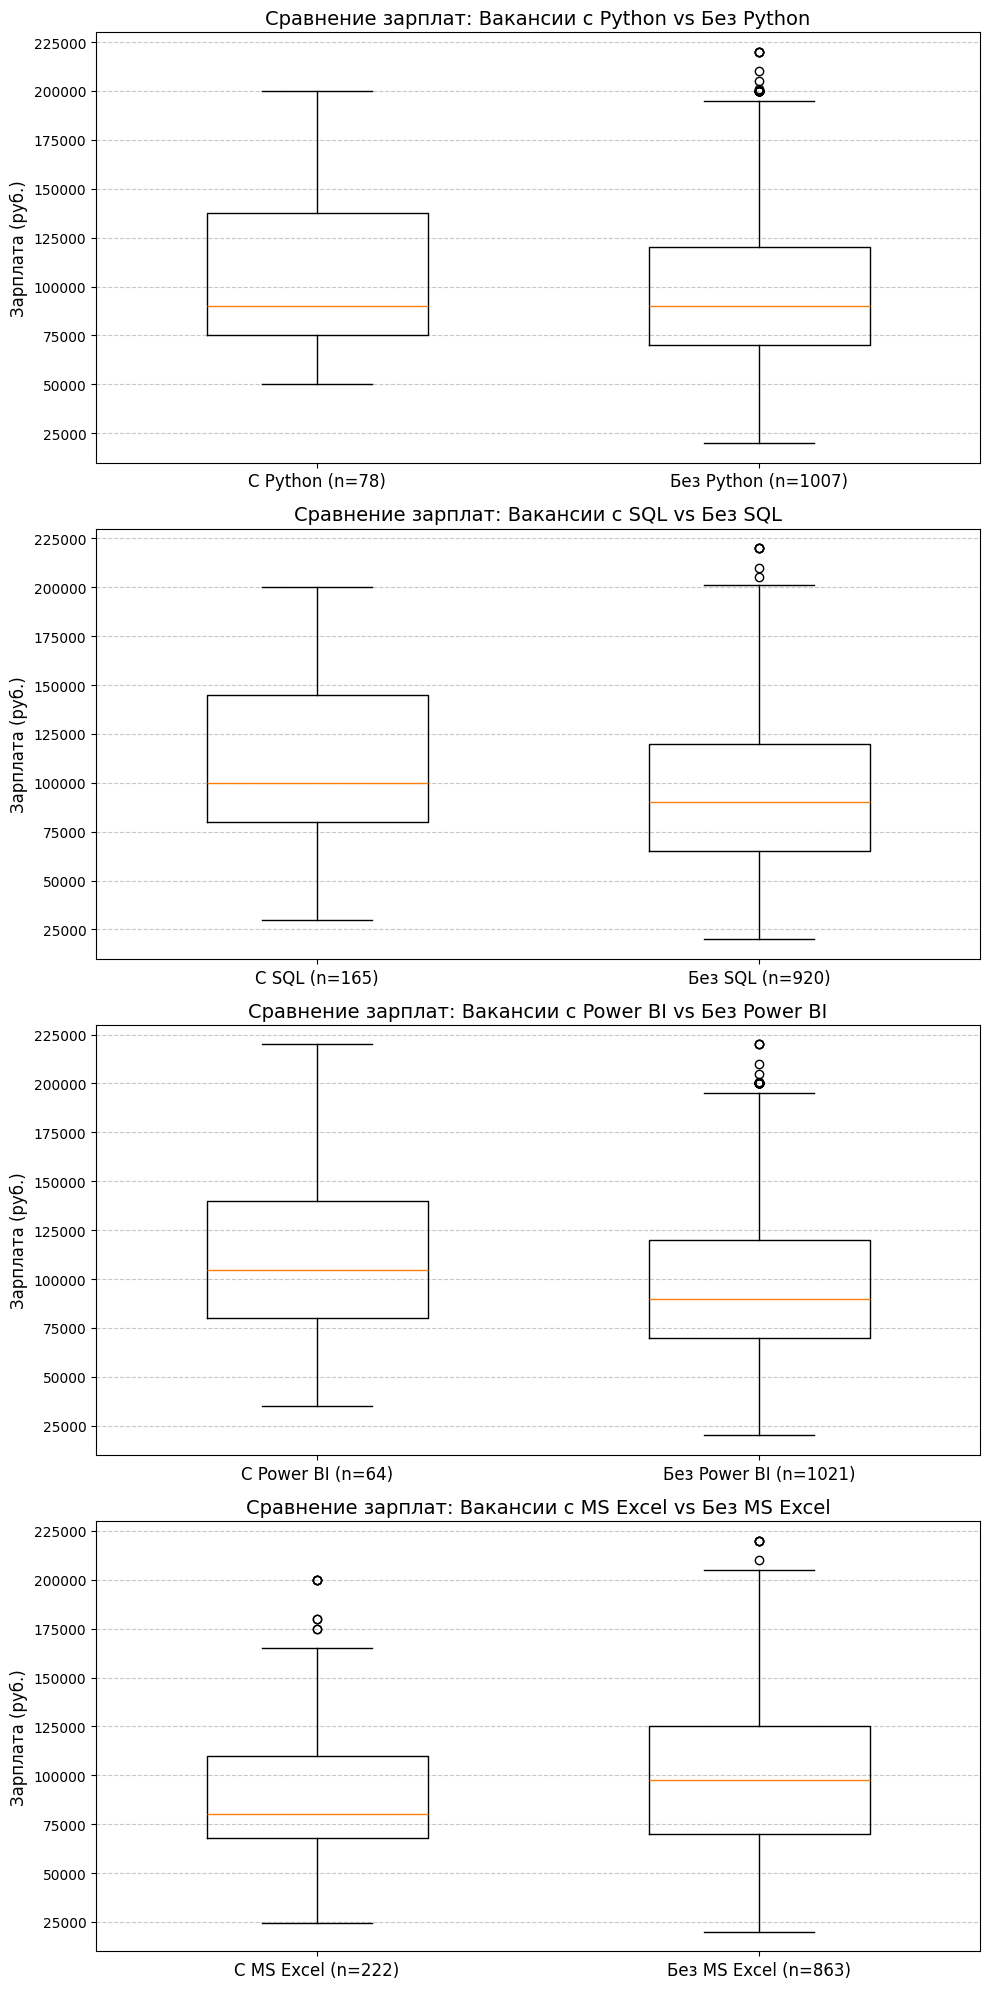

In [28]:
fig, axes = plt.subplots(nrows=len(results), ncols=1, figsize=(10, 5 * len(results)))

for i, (skill, data) in enumerate(results.items()):
    skill_salaries = data['skill_salaries']
    no_skill_salaries = data['no_skill_salaries']

    axes[i].boxplot(
        [skill_salaries, no_skill_salaries],
        widths=0.5,
        tick_labels=[f'С {skill} (n={len(skill_salaries)})', f'Без {skill} (n={len(no_skill_salaries)})']
    )

    axes[i].set_title(f'Сравнение зарплат: Вакансии с {skill} vs Без {skill}', fontsize=14)
    axes[i].set_ylabel('Зарплата (руб.)', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()